## 1. Importing necessary Libraries

In [ ]:

!pip install transformers datasets torch
!pip install seaborn
!pip install emoji
!pip install ydata_profiling
!pip install nltk


from datasets import load_dataset
import pandas as pd
import torch

import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string
import emoji



Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Importing the dataset from Huggingface
#### **NOTE** we can add an improvement, we can do 3 splits for training, testing and validation 

In [ ]:
# loading the dataset
dataset = load_dataset("toughdata/quora-question-answer-dataset")

#The dataset contains only one list 'train', we split this into train and test sets respectively,

dataset = dataset["train"].train_test_split(test_size=0.2)

## 3. Data Exploration and Analysis

### 3.1 Converting the dataset into pandas dataframe for easier analysis

In [ ]:
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

### 3.2 Checking the rows and columns in our dataset

In [ ]:
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45121 entries, 0 to 45120
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  45121 non-null  object
 1   answer    45121 non-null  object
dtypes: object(2)
memory usage: 705.1+ KB
None
                                                 question answer
count                                               45121  45121
unique                                               3147  43895
top     What are some tips for me if I am new to compe...   No\n
freq                                                   89     67


In [ ]:
print(df_train.head())
print(df_test.head())

                                            question  \
0  How powerful would Hulk be if he was in DC as ...   
1  Can I do fashion designing after completing po...   
2  Are NRA members proud that legally owned guns ...   
3   What is the best way for preparing for GATE CSE?   
4  What will happen to Big Pharma when cannabis i...   

                                              answer  
0  Would be op as hell red lantern ring can make ...  
1  [LINKED_TEXT: Diploma in Fashion Designing in ...  
2  A firearm is not acquired legally if you lie o...  
3  check out\n [LINKED_TEXT: Anu Sharma's answer ...  
4          They will suffer like they deserve too.\n  
                                            question  \
0  What is the best way to get discounts on hotel...   
1       How do I talk like a native English speaker?   
2     What is the weirdest object you've ever found?   
3  Why aren't hydroelectric power plants as wides...   
4    What is the most incredible feat of human will? 

### 3.3 Checking the distribution of 'question' and 'answer columns of out dataset

Example answer lengths: [40, 317, 55, 24, 7, 59, 203, 11, 453, 138]
Example question lengths: [14, 8, 14, 10, 19, 8, 11, 5, 9, 8]


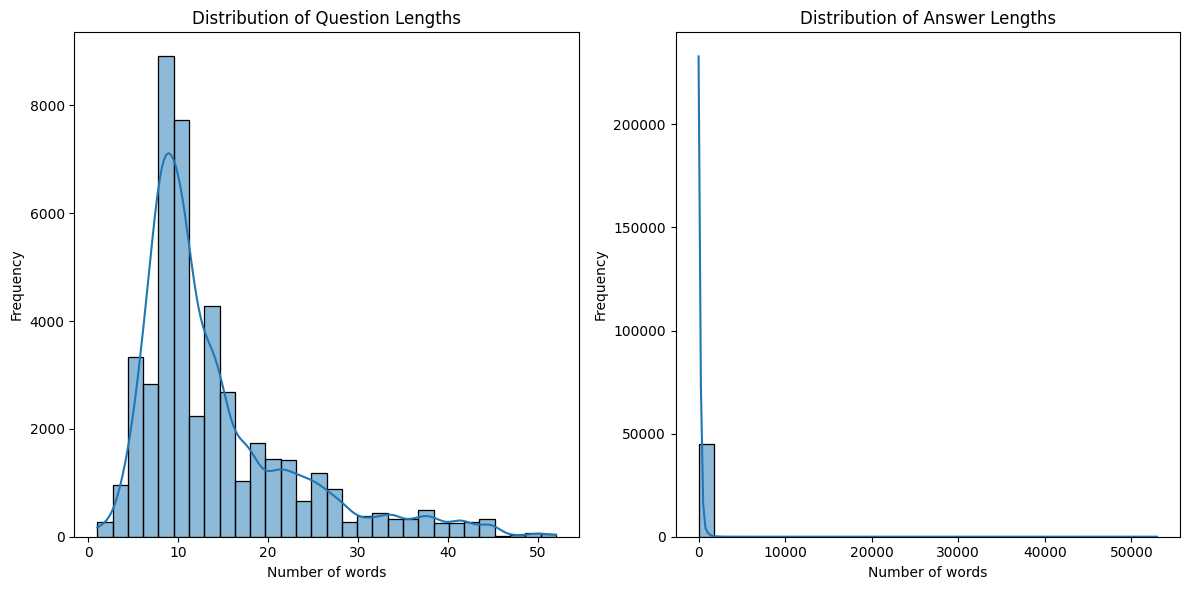

In [ ]:
import matplotlib.pyplot as plt
# Calculate the lengths of questions and answers for training set
question_lengths = [len(question.split()) for question in dataset['train']['question']]
answer_lengths = [len(answer.split()) for answer in dataset['train']['answer']]

# Set up the plotting area
plt.figure(figsize=(12, 6))

print("Example answer lengths:", answer_lengths[:10])
print("Example question lengths:",question_lengths[:10])

# Plot the distribution of question lengths
plt.subplot(1, 2, 1)
sns.histplot(question_lengths, bins=30, kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of words')
plt.ylabel('Frequency')

# Plot the distribution of answer lengths
plt.subplot(1, 2, 2)
sns.histplot(answer_lengths, bins=30, kde=True)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of words')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

Example answer lengths: [227, 34, 53, 27, 418, 99, 39, 287, 50, 40]
Example question lengths: [11, 9, 8, 11, 9, 16, 12, 16, 6, 6]


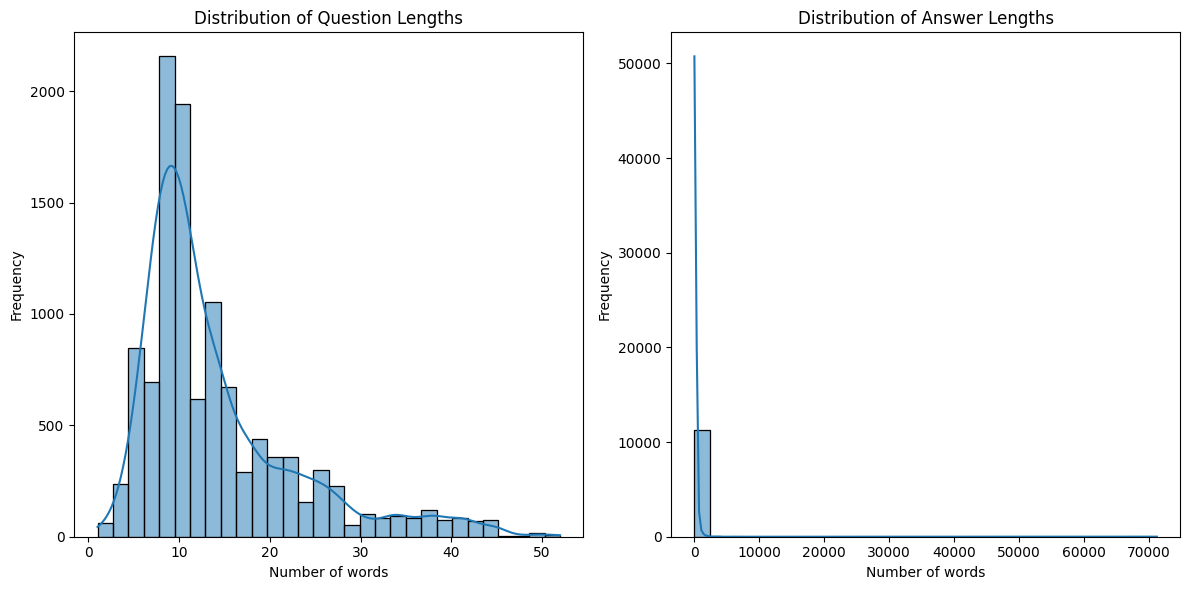

In [ ]:
# Calculate the lengths of questions and answers for testing set
question_lengths = [len(question.split()) for question in dataset['test']['question']]
answer_lengths = [len(answer.split()) for answer in dataset['test']['answer']]

# Set up the plotting area
plt.figure(figsize=(12, 6))

print("Example answer lengths:", answer_lengths[:10])
print("Example question lengths:",question_lengths[:10])

# Plot the distribution of question lengths
plt.subplot(1, 2, 1)
sns.histplot(question_lengths, bins=30, kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of words')
plt.ylabel('Frequency')

# Plot the distribution of answer lengths
plt.subplot(1, 2, 2)
sns.histplot(answer_lengths, bins=30, kde=True)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of words')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

### 3.4 Generating a profiling report using pandas for analysis, see the outputs in the html file saved.

In [ ]:
# use !pip install --upgrade --force-reinstall ydata-profiling in case of an old version
!pip install --upgrade numba visions
from ydata_profiling import ProfileReport

# Sample a subset of the DataFrame
df_train_sample = df_train.sample(n=1000, random_state=1)  

# Generate and save the profile report for the sample
profile = ProfileReport(df_train_sample, title='Pandas Profiling Report (Sample)', explorative=True)
profile.to_file("pandas_profiling_report_sample.html")

print("Pandas Profiling report for sample generated and saved.")



Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling report for sample generated and saved.


### 3.5 Checking if the data contains emojis and URLs using regex

In [ ]:
import re

def contains_emoji(text):
    emoji_pattern = re.compile(
        "["                   # Start of character set
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed Characters
        "\u200d"                # Zero Width Joiner
        "\u2640-\u2642"         # Gender Symbols
        "\u2600-\u2B55"         # Misc Symbols
        "]+", flags=re.UNICODE)
    
    return bool(emoji_pattern.search(text))

def contains_url(text):
    url_pattern = re.compile(
        r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return bool(url_pattern.search(text))

foundemoji=0
foundurl=0

for text in df_train["question"]:
    if contains_emoji(text) and foundemoji==0:
        print(f"Question contains emoji: {text}")
        foundemoji=1
    if contains_url(text) and foundurl==0:
        print(f"Question contains URL: {text}")
        foundurl=1
        
foundemoji=0
foundurl=0
for text in df_train["answer"]:
    if contains_emoji(text) and foundemoji==0:
        print(f"Answer contains emoji: {text}")
        foundemoji=1
    if contains_url(text) and foundurl==0:
        print(f"Answer contains URL: {text}")
        foundurl=1
        




Question contains URL: https://www.quora.com/profile/Me...
Question contains emoji: I found my cat dead outside my house😞 near an electricity box with no injuries just blood coming out from mouth or nose. Was it just from shock from electricity or could there be any other reasons?
Answer contains URL: [LINKED_TEXT: Diploma in Fashion Designing in Chennai] [URL: http://www.colorsfashiondesign.com/about-us.php]
 [LINKED_TEXT: Colors Institute of Fashion Technology has a finest Fashion Designing course in Chennai with the offering in three levels 6 months fast track fashion designing course in Chennai, 1 year diploma fashion designing course in Chennai, 2 years diploma fashion designing course in Chennai.] [URL: http://www.colorsfashiondesign.com/about-us.php]
 Technicalities of fashion designing like illustration templates which is about sketching the templates to show case your collection, pattern making is the process of making certain cut out that needs to be made on the garment using

## 4. Data Preprocessing
           
   ### 4.1 Insights
           
          1. The data contains a lot of stop words ( as seen in the wordcloud with irrelevant stop words appearing frequently).
          2. The data contains emojis and URLs which need to be converted to appropriate format
          3. Uppercase characters are converted to lowercase to ensure cleaner text
          4. HTML tags, punctuation,and spaces are removed
          5. Removing Duplicates, handling null values, and cleaning text are performed
          6. Tokenization is performed to remove stop words
          7. Lemmatization is performed, optionally stemming can be performed
          8. NOTE: Tokenization and Stemming need not be performed separately as they are present in the special tokenizer of models, however I have  performed tokenization here   
          9. The preprocessed datasets are stored in a csv file 
          
  ### 4.2 Improvements
####           1. The text contains instances of languages like Hindi, Japanese and Sanskrit (found using manual inspection of the dataset and pandas profiling), separate preprocessing steps using libraries that can handle these formats can be done.
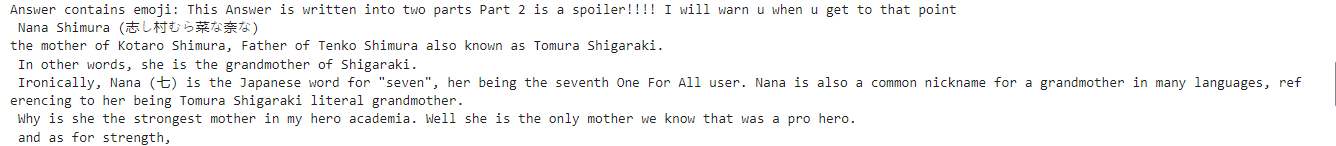
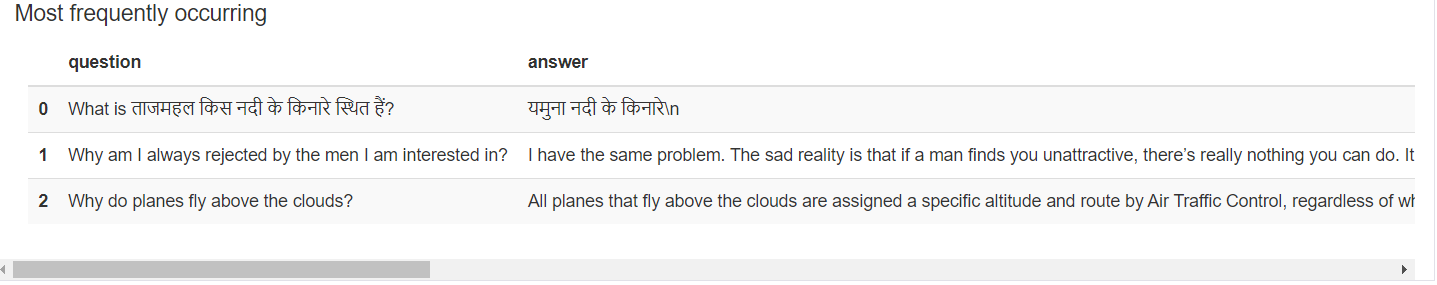
#### 2. Data augmentation to include a 'context' column to match the format of models can be done
          


In [ ]:
import re

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Get stop words
stop_words = set(stopwords.words('english'))

def remove_urls(text):
    """Remove URLs from a given text."""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


def convert_emojis(text):
    """Convert emojis in the text to their textual descriptions."""
    return emoji.demojize(text)

def clean_text(text):
    """Clean text by removing HTML tags, extra spaces, and punctuation, and converting emojis."""
    text = text.lower()  # Convert to lowercase
    text = convert_emojis(text)  # Convert emojis to text
    text = remove_urls(text)
    text = re.sub(r'\<[^>]*\>', '', text)  # Remove HTML tags
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    return text

def preprocess_text(text, use_stemming=False, use_lemmatization=True):
    """Preprocess text by cleaning, removing stop words, and optionally applying stemming or lemmatization."""
    # Clean the text
    text = clean_text(text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
#     Apply stemming or lemmatization
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    elif use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Reconstruct the text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

def preprocess_dataframe(df):
    """Preprocess the dataframe by removing duplicates, handling null values, and cleaning text."""
    # Remove duplicates
    df.drop_duplicates(inplace=True)

    
    # Remove rows with null values in 'question' or 'answer'
    df.dropna(subset=['question', 'answer'], inplace=True)
    
    # Apply preprocessing to the 'question' and 'answer' columns
    df['question'] = df['question'].apply(lambda x: preprocess_text(x, use_stemming=False, use_lemmatization=True))
    df['answer'] = df['answer'].apply(lambda x: preprocess_text(x, use_stemming=False, use_lemmatization=True))
    
    # Add context column for T5
    # df['context'] = df['question']  # Assuming context is the question itself; adjust as needed
    
    return df

# Preprocess the train and test dataframes

df_train_processed = preprocess_dataframe(df_train)
df_test_processed = preprocess_dataframe(df_test)

# Save the preprocessed datasets
df_train_processed.to_csv('preprocessed_train_dataset.csv', index=False)
df_test_processed.to_csv('preprocessed_test_dataset.csv', index=False)

print("Data preprocessing complete. Preprocessed datasets saved.")


Data preprocessing complete. Preprocessed datasets saved.


## Checking for special characters

In [ ]:
import pandas as pd

# Example for a DataFrame
df = pd.read_csv('preprocessed_train_dataset.csv')
df_test = pd.read_csv('preprocessed_test_dataset.csv')
unique_chars_train_question = set("".join(df['question'].astype(str)))
unique_chars_test_question = set("".join(df['question'].astype(str)))
unique_chars_train_answer = set("".join(df['answer'].astype(str)))
unique_chars_test_answer = set("".join(df['answer'].astype(str)))
print(unique_chars_train_question)
print(unique_chars_train_answer) 
print(unique_chars_test_question)
print(unique_chars_test_answer)

In [ ]:
import pandas as pd
import re

# Example dataframe

# Define a regex pattern to match non-standard characters
pattern = re.compile(r'[^\x00-\x7F]')

# Function to handle non-string values
def find_non_standard_chars(text):
    if isinstance(text, str):  # Check if the value is a string
        return pattern.findall(text)
    else:
        return []  # Return an empty list if not a string

# Apply the function to the 'answer' column
matches = df['answer'].apply(find_non_standard_chars)

print(matches)


In [ ]:
def clean_text(text):
    if isinstance(text, str):
        # Replace non-standard characters with standard ones or empty string
        for char in pattern.findall(text):
            text = text.replace(char, '')  # or replace with a standard character if needed
    return text

df['question'] = df['question'].apply(clean_text)
df['answer'] = df['answer'].apply(clean_text)
df['question'] = df['question'].apply(clean_text)
df['answer'] = df['answer'].apply(clean_text)

In [ ]:
# def has_excessive_non_standard_chars(text, threshold=0.1):
#     if isinstance(text, str):
#         non_standard_chars = pattern.findall(text)
#         return len(non_standard_chars) / len(text) > threshold
#     return False

# df_cleaned = df[~df['answer'].apply(has_excessive_non_standard_chars)]

In [ ]:
unique_chars_train_question = set("".join(df['question'].astype(str)))
unique_chars_test_question = set("".join(df['question'].astype(str)))
unique_chars_train_answer = set("".join(df['answer'].astype(str)))
unique_chars_test_answer = set("".join(df['answer'].astype(str)))
print(unique_chars_train_question)
print(unique_chars_train_answer) 
print(unique_chars_test_question)
print(unique_chars_test_answer)

In [ ]:
print(df['answer'].head())

In [ ]:
df.to_csv('preprocessed_train_dataset.csv', index=False)
df_test.to_csv('preprocessed_test_dataset.csv', index=False)

### 4.3 Dataset is converted to str format to ensure compatibility and subsequently also stored in original huggingface dataset format

In [ ]:
from datasets import Dataset, DatasetDict
df_test_preprocessed = pd.read_csv('preprocessed_test_dataset.csv')
df_train_preprocessed = pd.read_csv('preprocessed_train_dataset.csv')
df_train_preprocessed['question'] = df_train_preprocessed['question'].astype(str)
df_train_preprocessed['answer'] = df_train_preprocessed['answer'].astype(str)
df_test_preprocessed['question'] = df_test_preprocessed['question'].astype(str)
df_test_preprocessed['answer'] = df_test_preprocessed['answer'].astype(str)

train_dataset = Dataset.from_pandas(df_train_preprocessed)
test_dataset = Dataset.from_pandas(df_test_preprocessed)

dataset_preprocessed = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

print(dataset_preprocessed)




DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 44247
    })
    test: Dataset({
        features: ['question', 'answer'],
        num_rows: 11184
    })
})


## 5. Comparsion between the datasets

###  The original unprocessed dataset is once again imported for comparsion

In [ ]:
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

### 5.1 Data Distribution comparison between original and processed training datasets
The answers show nearly the same distribution, question distribution is different 

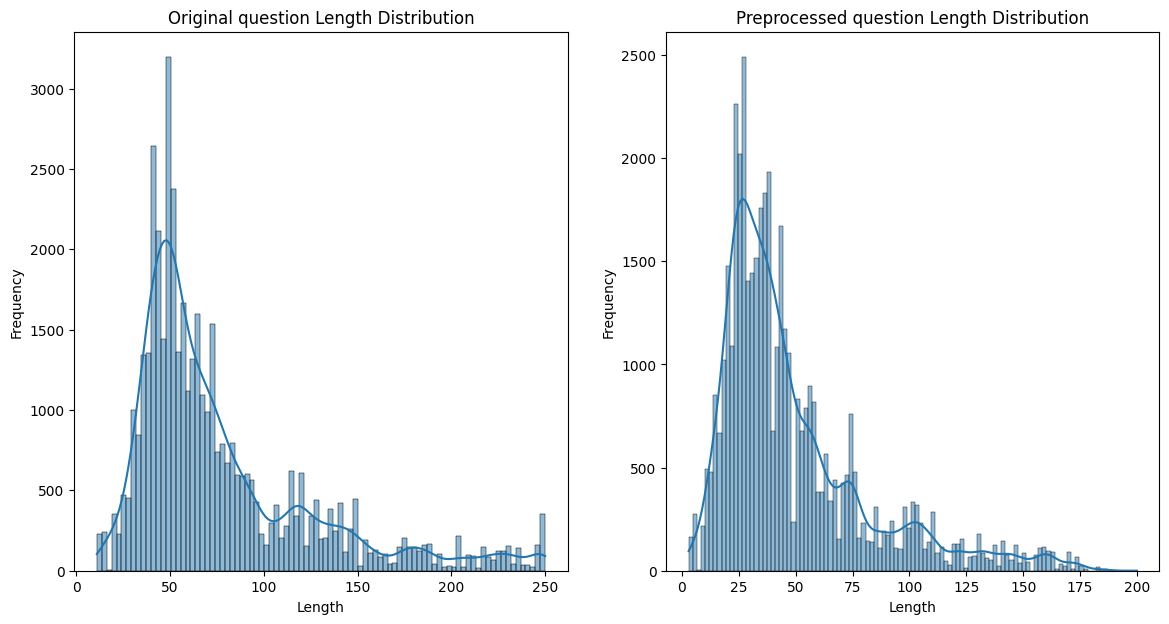

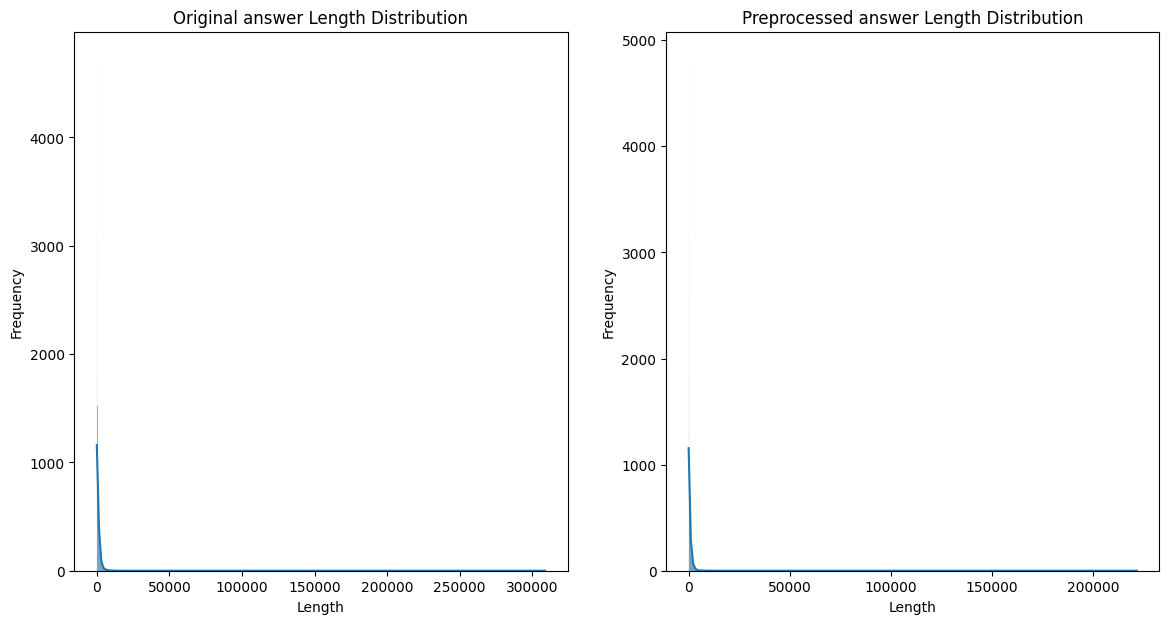

In [ ]:
def plot_length_distribution(df_original, df_preprocessed, column):
    plt.figure(figsize=(14, 7))

    # Original data distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[column].apply(len), kde=True)
    plt.title('Original ' + column + ' Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')

    # Preprocessed data distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_preprocessed[column].apply(len), kde=True)
    plt.title('Preprocessed ' + column + ' Length Distribution')
    plt.xlabel('Length')
    plt.ylabel('Frequency')

    plt.show()

# Plot distributions for 'question' and 'answer' columns
plot_length_distribution(df_train, df_train_preprocessed, 'question')
plot_length_distribution(df_train, df_train_preprocessed, 'answer')


### 5.2 Vocabulary analysis: To check how much redundancy is reduced

In [ ]:
from collections import Counter

def analyze_vocabulary(df_original, df_preprocessed, column):
    original_vocab = Counter(' '.join(df_original[column]).split())
    preprocessed_vocab = Counter(' '.join(df_preprocessed[column]).split())
    
    print(f"Original {column} vocabulary size: {len(original_vocab)}")
    print(f"Preprocessed {column} vocabulary size: {len(preprocessed_vocab)}")
    print(f"Common vocabulary size: {len(set(original_vocab) & set(preprocessed_vocab))}")

# Analyze vocabularies for 'question' and 'answer' columns
analyze_vocabulary(df_train, df_train_preprocessed, 'question')
analyze_vocabulary(df_train, df_train_preprocessed, 'answer')
analyze_vocabulary(df_test, df_test_preprocessed, 'question')
analyze_vocabulary(df_test, df_test_preprocessed, 'answer')


Original question vocabulary size: 12224
Preprocessed question vocabulary size: 8130
Common vocabulary size: 4505
Original answer vocabulary size: 358557
Preprocessed answer vocabulary size: 156061
Common vocabulary size: 57266
Original question vocabulary size: 9563
Preprocessed question vocabulary size: 6512
Common vocabulary size: 3665
Original answer vocabulary size: 141310
Preprocessed answer vocabulary size: 62590
Common vocabulary size: 28752


### 5.3 Readabilty Analsysis: To check the readability of the dataset
    The readabiliity is reduced due to a higher score, however semantic meaning is retained as indicated by cosine similarity 

In [ ]:
!pip install textstat
import textstat

def readability_analysis(df_original, df_preprocessed, column):
    original_readability = df_original[column].apply(textstat.flesch_kincaid_grade)
    preprocessed_readability = df_preprocessed[column].apply(textstat.flesch_kincaid_grade)
    
    print(f"Original {column} readability score (avg): {original_readability.mean()}")
    print(f"Preprocessed {column} readability score (avg): {preprocessed_readability.mean()}")

# Analyze readability for 'question' and 'answer' columns
readability_analysis(df_train, df_train_preprocessed, 'question')
readability_analysis(df_train, df_train_preprocessed, 'answer')


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Original question readability score (avg): 5.508698832029432
Preprocessed question readability score (avg): 7.851630619025018
Original answer readability score (avg): 8.117441989317612
Preprocessed answer readability score (avg): 37.696727461748814


### 5.5 Pandas Profiling Report for the new dataset: The stop words, duplcates, missing values are all removed in the processed dataset.

In [ ]:
df_train_sample = df_train_preprocessed.sample(n=1000, random_state=1)  # Adjust sample size as needed

# Generate and save the profile report for the sample
profile = ProfileReport(df_train_sample, title='Pandas Profiling Report (Sample)', explorative=True)
profile.to_file("pandas_profiling_report_sample_after.html")

print("Pandas Profiling report for sample generated and saved.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Profiling report for sample generated and saved.


### 5.6 Cosine Similarity

In [ ]:
!pip install transformers
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\gupta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


: 

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_embeddings(text_list):
    inputs = tokenizer(text_list, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Get embeddings for original and preprocessed questions
original_embeddings = get_embeddings(df_train['question'].tolist()[:100])  # Sample for demonstration
preprocessed_embeddings = get_embeddings(df_train_preprocessed['question'].tolist()[:100])

# Calculate cosine similarity
similarity = cosine_similarity(original_embeddings, preprocessed_embeddings).diagonal().mean()
print(f"Average cosine similarity between original and preprocessed embeddings: {similarity}")


In [ ]:
df_train['answer']

In [ ]:
# from transformers import BertTokenizer, BertModel
# import torch
# from sklearn.metrics.pairwise import cosine_similarity

# # Load pre-trained model and tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# def get_embeddings(text_list):
#     inputs = tokenizer(text_list, return_tensors='pt', padding=True, truncation=True)
#     outputs = model(**inputs)
#     return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# # Get embeddings for original and preprocessed questions
# original_embeddings = get_embeddings(df_train['answer'].tolist()[:100])  # Sample for demonstration
# preprocessed_embeddings = get_embeddings(df_train_preprocessed['answer'].tolist()[:100])

# # Calculate cosine similarity
# similarity = cosine_similarity(original_embeddings, preprocessed_embeddings).diagonal().mean()
# print(f"Average cosine similarity between original and preprocessed embeddings: {similarity}")